In [1]:
%cd drive/MyDrive/Colab_Notebooks/PV_SST_Linearity

/content/drive/MyDrive/Colab_Notebooks/PV_SST_Linearity


In [2]:
%run PV_run.ipynb

class Synapse:
    def __init__(self, branch_id: int, segment: float):
        self.branch_id = branch_id
        self.segment = segment


|-----------|       soma_0(0-1)
             `----------|       apical_trunk_1(0-1)
                         `----------|       apical_2(0-1)
                                     `----------|       apical_3(0-1)
                                                 `----------|       apical_4(0-1)
                                                 `----------|       apical_5(0-1)
                                     `----------|       apical_6(0-1)
                                                 `----------|       apical_7(0-1)
                                                 `----------|       apical_8(0-1)
                         `----------|       apical_9(0-1)
                                     `----------|       apical_10(0-1)
                                                 `----------|       apical_11(0-1)
                                                 `----------|       apical_12(0-1)
                                     `----------|       apical_13(0-1)
                       

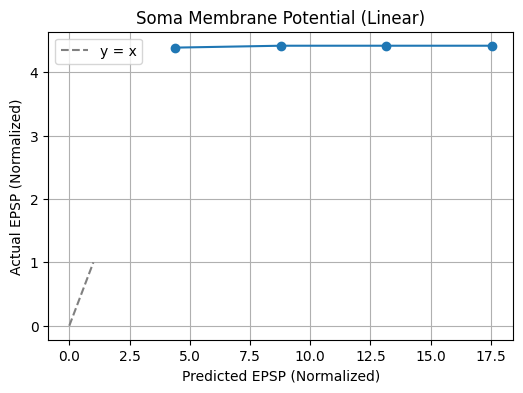

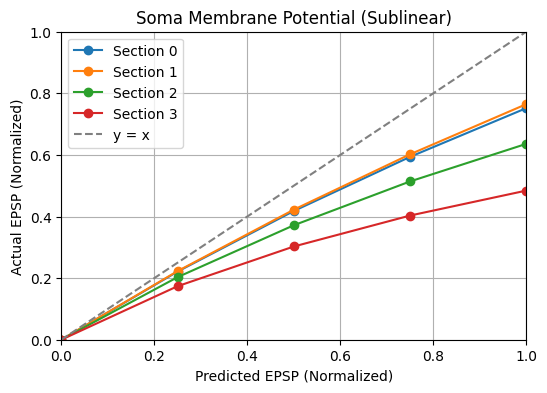

Section: soma_0
  nseg = 11
  L = 474.34164902525697 µm
  diam = 1.0 µm
  Ra = 100.0 Ω·cm
  cm = 1.0 µF/cm²
Section: apical_trunk_1
  nseg = 11
  L = 474.34164902525697 µm
  diam = 1.0 µm
  Ra = 100.0 Ω·cm
  cm = 1.0 µF/cm²
Section: apical_2
  nseg = 11
  L = 376.4852163275116 µm
  diam = 0.6299605249474366 µm
  Ra = 100.0 Ω·cm
  cm = 1.0 µF/cm²


In [3]:
def simulate():
  #---- USER PICKS THE FOLLOWING VARIABLES ----#
  apic_branch_num = 2
  apic_branch_iter = 3
  basal_branch_num = 4
  basal_branch_iter = 3
  synapse_list = [
  Synapse(0, 0.5),
  Synapse(1, 0.5),
  Synapse(2, 0.5),
  Synapse(3, 0.5)
  ]
  #--------------------------------------------#
  h.load_file('stdrun.hoc')
  dends = []
  gen_dend(dends, 'soma')
  gen_dend(dends, 'apical_trunk', dends[0])
  gen_tree(dends, 'apical', dends[1], apic_branch_num, apic_branch_iter)
  gen_tree(dends, 'basal', dends[0], basal_branch_num, basal_branch_iter)
  h.topology()
  print(dends[0].name())

  arith = []
  maxes = []

  plt.figure(figsize=(6, 4))
  maxes = EPSP_vecs_linear(dends, synapse_list)
  arith = arithmetic(maxes)
  plt.plot(arith, maxes, '-o')
  x = np.linspace(0, 1, 100)
  plt.plot(x, x, '--', color='grey', label='y = x')
  plt.xlabel('Predicted EPSP (Normalized)')
  plt.ylabel('Actual EPSP (Normalized)')
  plt.title(f'Soma Membrane Potential (Linear)')
  # plt.xlim(0, 1)
  # plt.ylim(0, 1)
  plt.legend(loc='upper left')
  plt.grid(True)
  plt.show()


  plt.figure(figsize=(6, 4))
  for i in range (len(synapse_list)):
    maxes = EPSP_vecs_sublinear(dends, synapse_list[i : i + 1])
    arith = arithmetic(maxes)
    maxes = autoscale(maxes, arith[-1])
    arith = autoscale(arith)
    plt.plot(arith, maxes, '-o', label=f'Section {synapse_list[i].branch_id}')
  x = np.linspace(0, 1, 100)
  plt.plot(x, x, '--', color='grey', label='y = x')
  plt.xlabel('Predicted EPSP (Normalized)')
  plt.ylabel('Actual EPSP (Normalized)')
  plt.title(f'Soma Membrane Potential (Sublinear)')
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.legend(loc='upper left')
  plt.grid(True)
  plt.show()

  def describe_section(sec):
    sec.push()  # make this the currently accessed section
    print(f"Section: {sec.name()}")
    print(f"  nseg = {sec.nseg}")
    print(f"  L = {sec.L} µm")
    print(f"  diam = {sec.diam} µm")
    print(f"  Ra = {sec.Ra} Ω·cm")
    print(f"  cm = {sec.cm} µF/cm²")
  describe_section(dends[0])
  describe_section(dends[1])
  describe_section(dends[2])

simulate()